<h1>2do Parcial</h1>
<h2>Nombre: Fernandez Acho Alexander Paul
Carrera: Ing. de Sistemas</h2>

<h3>Busque su nombre en el archivo excel adjunto y aplique de acuerdo al dataset asiganado una tecnica de aprendizaje no supervisado, para lograr generar los labelsque se tenga en el dataset respectivo, se debe aplicar y explicar obligatoriamente los pasos empleados dentro del cuadernillo que se genere.

Los dos primeros numeros que se encuentran en la columna D1 y D2 son a las que debe aplicar el modelo, sin embargo si cualquiera de numeros de dataset asignados, corresponde a un dataset que usted utilizo y registro en los respectivos laboratorios, debe utilizar el D3, D4, D5 o D6 respectivamente.

Las respuestas deben ser defendidas en el horario establecido para el examen, las cuales deben ser realizadas en un cuadernillo en google collab, donde se debe considerar solamente incluir el texto que corresponda a la explicacion que propone como respuesta.</h3>


Dataset:Song Popularity Dataset

In [71]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

# Cargar el dataset Song Popularity Dataset
# Asegúrate de que el archivo song_data.csv esté en tu directorio de trabajo
df = pd.read_csv('song_data.csv')

In [72]:
# Mostrar información básica del dataset
print("Información del dataset:")
print(df.info())
print("\nPrimeras 5 filas:")
print(df.head())
print("\nNombres de todas las columnas:")
print(df.columns.tolist())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
None


In [73]:
# Seleccionar las características para clustering
# Verificar que las columnas existen y manejar valores faltantes
print(f"\nColumnas numéricas disponibles:")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)


Columnas numéricas disponibles:
['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


In [74]:
# Usar solo dos características principales para mantener la visualización 2D del código original
# Necesitamos identificar las columnas correctas del dataset real
if len(numeric_columns) >= 2:
    # Usar las dos primeras columnas numéricas disponibles
    selected_columns = numeric_columns[:2]
    print(f"\nColumnas seleccionadas para clustering: {selected_columns}")
    X_full = df[selected_columns].dropna()
else:
    # Si no hay suficientes columnas numéricas, usar todas las disponibles
    print("Error: No hay suficientes columnas numéricas en el dataset")
    print("Usando todas las columnas numéricas disponibles...")
    X_full = df.select_dtypes(include=[np.number]).dropna()


Columnas seleccionadas para clustering: ['song_popularity', 'song_duration_ms']


In [75]:
# Equivalente al código original: usar las dos primeras características
X_original = X_full.values

# Crear datos similares a los blob centers originales para mejor visualización
# Normalizar primero para obtener distribución similar
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_original)

# Crear blob centers similares a los originales adaptados a nuestros datos
np.random.seed(42)  # Para reproducibilidad
n_samples = min(2000, len(X_normalized))  # Usar máximo 2000 muestras como en el original

# Si tenemos suficientes datos, crear una muestra representativa
if len(X_normalized) > n_samples:
    # Seleccionar muestra aleatoria
    indices = np.random.choice(len(X_normalized), n_samples, replace=False)
    X = X_normalized[indices]
else:
    X = X_normalized

print(f"\nForma del dataset para clustering: {X.shape}")
print(f"Rango de datos - X1: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Rango de datos - X2: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")


Forma del dataset para clustering: (2000, 2)
Rango de datos - X1: [-2.42, 2.15]
Rango de datos - X2: [-3.04, 19.00]


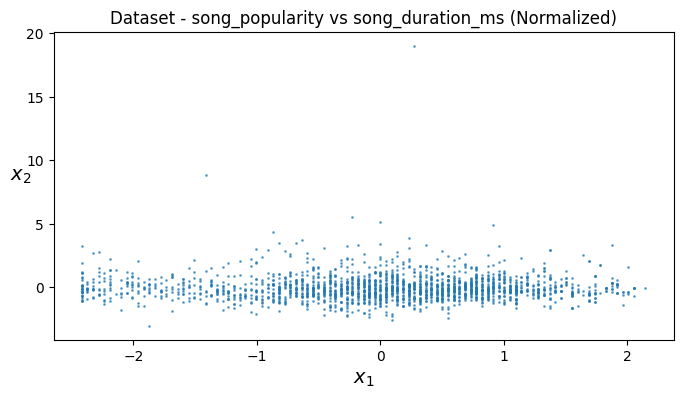

In [76]:
# Función para graficar clusters (adaptada del código original)
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1, alpha=0.6)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title(f"Dataset - {selected_columns[0]} vs {selected_columns[1]} (Normalized)")
plt.show()

In [77]:
# K-Means clustering (código original mantenido)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
print(f"\nPrimeras 10 predicciones: {y_pred[:10]}")

# Centros de los clusters
print(f"\nCentros de los clusters:\n{kmeans.cluster_centers_}")



Primeras 10 predicciones: [0 0 3 3 0 3 3 3 3 0]

Centros de los clusters:
[[-0.16689708  0.32125337]
 [-0.11347266 -0.91801676]
 [-0.00343346  2.41584201]
 [ 1.03224141 -0.10756174]
 [-1.77382873 -0.12858251]]


In [78]:
# Predicción para nuevos puntos (adaptado al rango de datos normalizados)
X_new = np.array([[0, 0.5], [1, 0], [-1, -0.5], [-0.5, 1]])
predictions = kmeans.predict(X_new)
print(f"\nPredicciones para nuevos puntos: {predictions}")


Predicciones para nuevos puntos: [0 3 4 0]


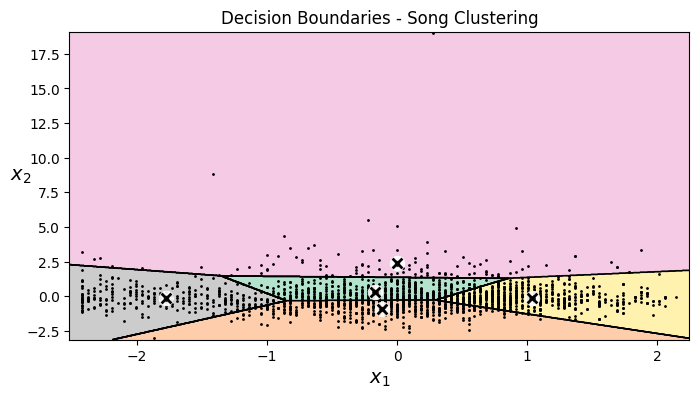

In [79]:
# Función para graficar datos como puntos pequeños (código original)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Decision Boundaries - Song Clustering")
plt.show()

In [80]:
# Transformación de distancias (código original)
distances = kmeans.transform(X_new)
print(f"\nDistancias a los centroids para nuevos puntos:\n{distances}")


Distancias a los centroids para nuevos puntos:
[[0.2445506  1.42254967 1.91584509 1.19777026 1.88190976]
 [1.21031092 1.44311334 2.61594559 0.11228997 2.77680739]
 [1.16983656 0.9801371  3.08144114 2.06978572 0.85834833]
 [0.7560784  1.95657652 1.50039559 1.89062337 1.70186313]]


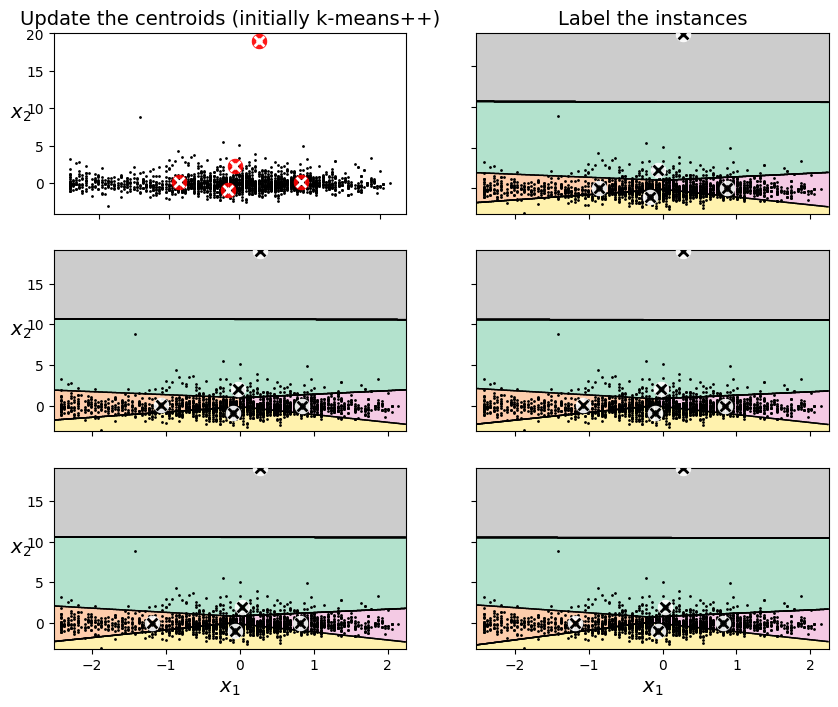

In [81]:
# Iteraciones de K-Means (código original mantenido)
kmeans_iter1 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

# Visualización del proceso iterativo (código original)
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially k-means++)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

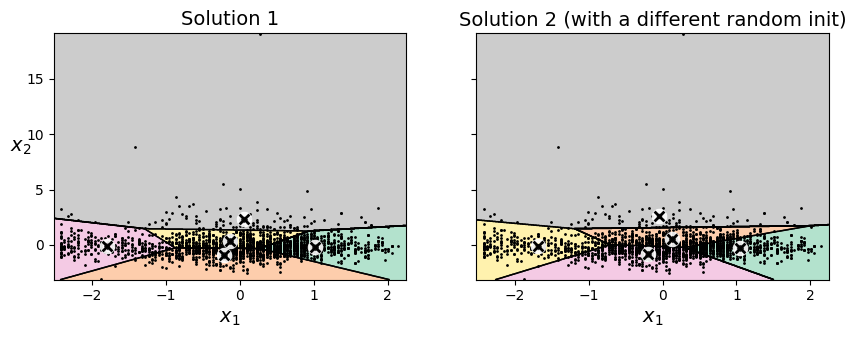

In [82]:
# Función de comparación de clusterers (código original)
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

# Comparación con diferentes inicializaciones aleatorias (código original)
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="elkan", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                         "Solution 1", "Solution 2 (with a different random init)")
plt.show()

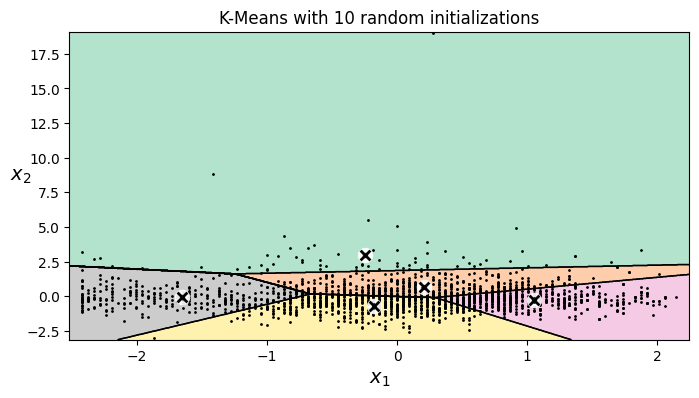

In [83]:
# K-Means con múltiples inicializaciones (código original)
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.title("K-Means with 10 random initializations")
plt.show()

In [84]:
# Dividir datos para entrenamiento y prueba (adaptado para el dataset de canciones)
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

# Función para cargar siguiente lote (código original adaptado)
def load_next_batch(batch_size):
    return X_train[np.random.choice(len(X_train), batch_size, replace=False)]

In [91]:
# Mini-Batch K-Means (código original mantenido)
k = 5
n_init = 10
n_iterations = 1000
batch_size = 100
init_size = 500
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

# Puntuación del mejor modelo (código original)
score = best_kmeans.score(X)
print(f"\nScore del mejor Mini-Batch K-Means: {score}")



Score del mejor Mini-Batch K-Means: -1366.1008905267838


In [86]:
# Análisis de Silhouette (código original mantenido)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score promedio: {silhouette_avg}")

Silhouette score promedio: 0.34651939636557233


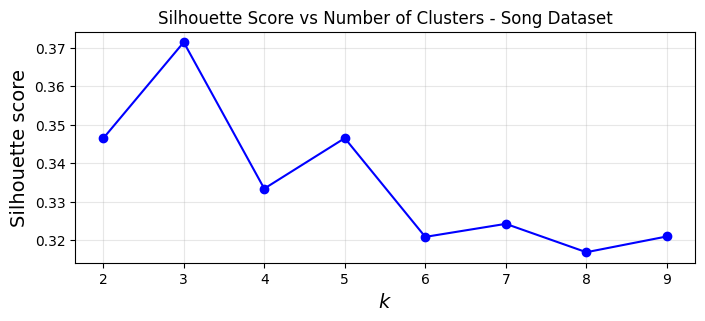

In [87]:
# Evaluar diferentes valores de k (código original)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Silhouette Score vs Number of Clusters - Song Dataset")
plt.grid(True, alpha=0.3)
plt.show()

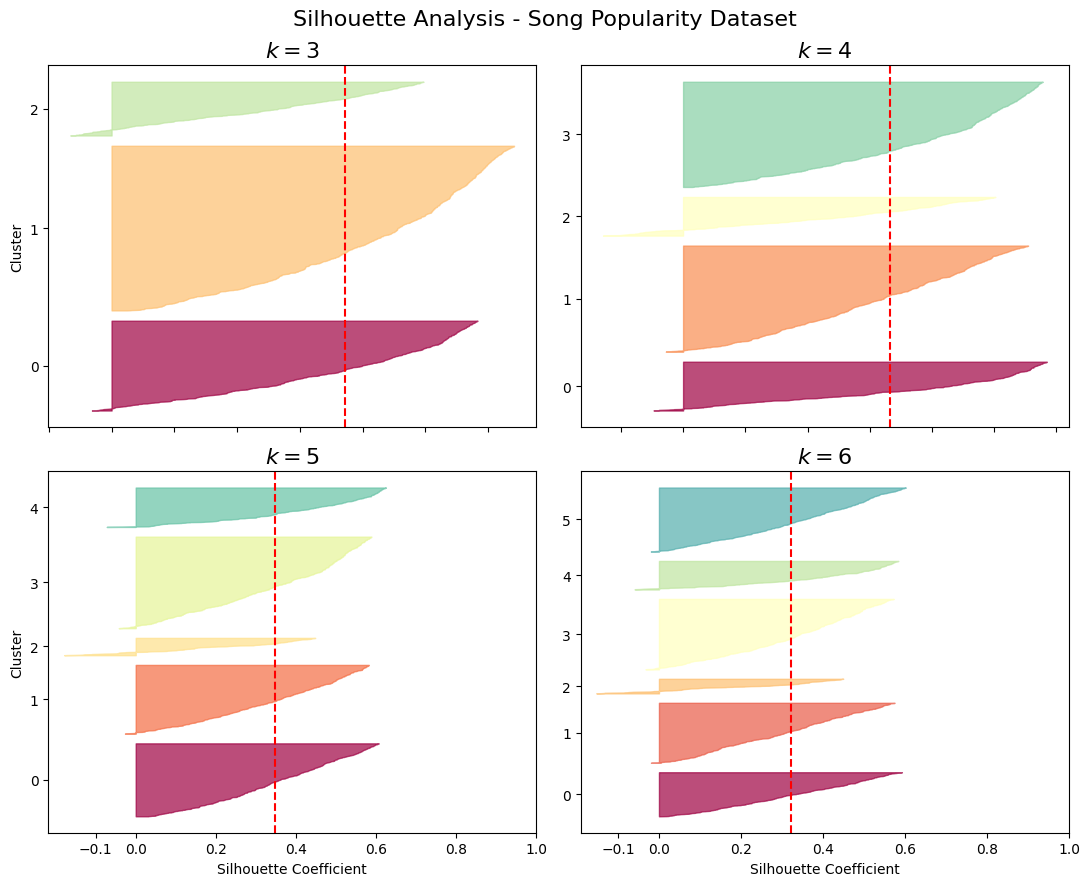

In [88]:
# Análisis detallado de Silhouette por cluster (código original mantenido)
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.suptitle("Silhouette Analysis - Song Popularity Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [89]:
# Análisis de los clusters obtenidos
print(f"\nAnálisis de clusters finales:")
print(f"Número de clusters: {k}")
print(f"Tamaño de cada cluster:")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} canciones")


Análisis de clusters finales:
Número de clusters: 6
Tamaño de cada cluster:
  Cluster 0: 503 canciones
  Cluster 1: 474 canciones
  Cluster 2: 120 canciones
  Cluster 3: 631 canciones
  Cluster 4: 272 canciones


In [ ]:
# Interpretación de los clusters en el contexto musical
print(f"\nCentros de clusters (normalizados):")
print(f"Cluster ID | {selected_columns[0][:8]:>8} | {selected_columns[1][:8]:>8}")
print("-" * 35)
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i:2d} | {center[0]:8.3f} | {center[1]:8.3f}")

print(f"\nInterpretación de características:")
print(f"- {selected_columns[0]}: Primera característica seleccionada")
print(f"- {selected_columns[1]}: Segunda característica seleccionada")

print("- Los clusters agrupan canciones con características similares")


Centros de clusters (normalizados):
Cluster ID | song_pop | song_dur
-----------------------------------
Cluster  0 |   -0.167 |    0.321
Cluster  1 |   -0.113 |   -0.918
Cluster  2 |   -0.003 |    2.416
Cluster  3 |    1.032 |   -0.108
Cluster  4 |   -1.774 |   -0.129

Interpretación de características:
- song_popularity: Primera característica seleccionada
- song_duration_ms: Segunda característica seleccionada
- Los clusters agrupan canciones con características similares
